<a href="https://colab.research.google.com/github/ronaknavadiya/pytorch-projects-practice-/blob/main/Tebular_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
!pip install opendatasets --quiet
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/mssmartypants/rice-type-classification'
od.download(dataset_url)

Skipping, found downloaded files in "./rice-type-classification" (use force=True to force download)


In [3]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

device = 'cuda' if torch.cuda.is_available() else 'cpu'    # check if cuda is availbale

print (device)




cuda


In [4]:
data_df = pd.read_csv('/content/rice-type-classification/riceClassification.csv')
data_df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [5]:
data_df.dropna(inplace=True)
data_df.drop(['id'], axis=1, inplace=True)
print(data_df.shape)

(18185, 11)


In [6]:
data_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [7]:
# print number of unique class
print(data_df["Class"].unique())

# print value counts of each class
print(data_df["Class"].value_counts())

[1 0]
Class
1    9985
0    8200
Name: count, dtype: int64


In [8]:
#  normalization

orignal_df = data_df.copy()

for column in data_df.columns:
  data_df[column] = data_df[column] / data_df[column].abs().max()

data_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,0.444368,0.503404,0.775435,0.744658,0.424873,0.666610,0.741661,0.537029,0.844997,0.368316,1.0
1,0.281293,0.407681,0.622653,0.750489,0.273892,0.530370,0.804230,0.409661,0.919215,0.371471,1.0
2,0.298531,0.416421,0.630442,0.756341,0.284520,0.546380,0.856278,0.412994,0.959862,0.374747,1.0
3,0.300979,0.420463,0.629049,0.764024,0.286791,0.548616,0.883772,0.414262,0.961818,0.379222,1.0
4,0.361704,0.464626,0.682901,0.775033,0.345385,0.601418,0.867808,0.452954,0.966836,0.386007,1.0


In [9]:
X = np.array(data_df.iloc[:,:-1])
Y = np.array(data_df.iloc[:,-1])
# print(X)

In [10]:
train_test_ratio = 0.3
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=train_test_ratio)

In [11]:
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size=0.5)

In [12]:
print(X_train.shape, X_test.shape, X_val.shape)

(12729, 10) (2728, 10) (2728, 10)


In [22]:
class dataset(Dataset):
  def __init__(self, X, Y):
    self.X = torch.tensor(X, dtype = torch.float32).to(device)
    self.Y = torch.tensor(Y, dtype = torch.float32).to(device)

  def __len__(self):
    return len(self.X)

  def __getitem__(self, index):
    return self.X[index], self.Y[index]


In [23]:
training_data = dataset(X_train, Y_train)
testing_data = dataset(X_test, Y_test)
validation_data = dataset(X_val, Y_val)

Dataloader ( batch the data size )

In [73]:
train_dataloader = DataLoader(training_data, batch_size = 32, shuffle= True)
test_dataloader = DataLoader(testing_data, batch_size = 32, shuffle= True)
val_dataloader = DataLoader(validation_data, batch_size = 32, shuffle= True)

In [74]:
for x,y in train_dataloader:
  print(x)
  print("========")
  print(y)
  break


tensor([[0.8625, 0.9150, 0.8170, 0.9470, 0.8125, 0.9287, 0.6535, 0.7562, 0.8271,
         0.6354],
        [0.6453, 0.7540, 0.7517, 0.9241, 0.6136, 0.8033, 0.8426, 0.6491, 0.8401,
         0.5691],
        [0.7306, 0.7908, 0.8108, 0.9174, 0.6893, 0.8547, 0.6514, 0.6804, 0.8653,
         0.5534],
        [0.5647, 0.7810, 0.6330, 0.9629, 0.5359, 0.7515, 0.5766, 0.6376, 0.7618,
         0.7000],
        [0.5906, 0.8647, 0.6011, 0.9823, 0.5641, 0.7685, 0.5005, 0.6956, 0.6694,
         0.8162],
        [0.5447, 0.8244, 0.5815, 0.9807, 0.5256, 0.7380, 0.6226, 0.6677, 0.6700,
         0.8044],
        [0.3720, 0.6910, 0.4803, 0.9823, 0.3646, 0.6099, 0.6898, 0.5472, 0.6814,
         0.8162],
        [0.5905, 0.8249, 0.6292, 0.9714, 0.5644, 0.7684, 0.7009, 0.6776, 0.7054,
         0.7439],
        [0.8385, 0.8693, 0.8462, 0.9296, 0.8071, 0.9157, 0.8802, 0.7493, 0.8191,
         0.5828],
        [0.6833, 0.7452, 0.7941, 0.9073, 0.6460, 0.8266, 0.7149, 0.6466, 0.8965,
         0.5324],
        [0

Build Model


In [75]:
HIDDEN_NEURONS = 10
class MyModel(nn.Module):
  def __init__(self):
    super(MyModel, self).__init__()

    self.input_layer = nn.Linear(X.shape[1], HIDDEN_NEURONS)
    self.linear = nn.Linear(HIDDEN_NEURONS, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
      x = self.input_layer(x)
      x = self.linear(x)
      x = self.sigmoid(x)
      return x

model = MyModel().to(device)

In [76]:
summary(model, (X.shape[1],))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]             110
            Linear-2                    [-1, 1]              11
           Sigmoid-3                    [-1, 1]               0
Total params: 121
Trainable params: 121
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [77]:
criterion = nn.BCELoss()
optimizer = Adam(model.parameters(), lr = 1e-3)

Check whether our model is over fitted or not

In [78]:
total_loss_train_plot = []
total_loss_val_plot = []
total_acc_train_plot = []
total_acc_val_plot = []

epochs = 10

for epoch in range(epochs):
  total_acc_train = 0
  total_loss_train = 0
  total_acc_val = 0
  total_loss_val = 0

  for data in train_dataloader:

    #  forward propogation
    inputs, labels = data

    prediction = model(inputs).squeeze(1)

    batch_loss = criterion(prediction, labels)

    total_loss_train += batch_loss.item()

    acc = ((prediction).round() == labels).sum().item()

    total_acc_train += acc

    #  backward propogation


    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()   # restart optimizer

  with torch.no_grad():
    for data in val_dataloader:
      inputs, labels = data

      prediction = model(inputs).squeeze(1)

      batch_loss = criterion(prediction, labels)

      total_loss_val += batch_loss.item()

      acc = ((prediction).round() == labels).sum().item()
      total_acc_val += acc


  total_loss_train_plot.append(round(total_loss_train/1000,4))
  total_loss_val_plot.append(round(total_loss_val/1000,4))
  total_acc_train_plot.append(round(total_acc_train/training_data.__len__() * 100, 4))
  total_acc_val_plot.append(round(total_acc_val/testing_data.__len__() * 100, 4))

  #   break
  # break

In [79]:
with torch.no_grad():
  total_acc_test = 0
  total_loss_test = 0

  for data in test_dataloader:
    inputs, labels = data

    prediction = model(inputs).squeeze(1)

    batch_loss = criterion(prediction,labels).item()

    total_loss_test += batch_loss

    acc = ((prediction).round() == labels).sum().item()
    total_acc_test += acc

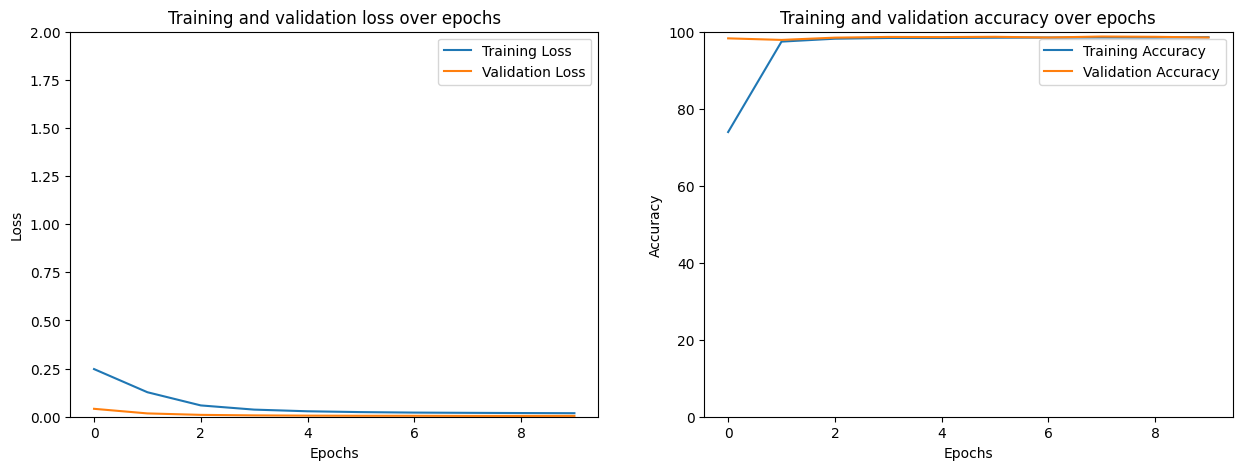

In [80]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

axis[0].plot(total_loss_train_plot, label = 'Training Loss')
axis[0].plot(total_loss_val_plot, label = 'Validation Loss')
axis[0].set_title("Training and validation loss over epochs")
axis[0].set_xlabel('Epochs')
axis[0].set_ylabel('Loss')
axis[0].set_ylim([0,2])
axis[0].legend()

axis[1].plot(total_acc_train_plot, label = 'Training Accuracy')
axis[1].plot(total_acc_val_plot, label = 'Validation Accuracy')
axis[1].set_title("Training and validation accuracy over epochs")
axis[1].set_xlabel('Epochs')
axis[1].set_ylabel('Accuracy')
axis[1].set_ylim([0,100])
axis[1].legend()

plt.show()